![alt text](https://i.imgur.com/1WaY7aA.png)

---



---



# Data Science and AI
## Demo 10: Neural Network Basics
INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Input data

In [2]:
# Input array
X = np.array([
  [1, 0, 1, 0],
  [1, 0, 1, 1],
  [0, 1, 0, 1]
])

# Output
y = np.array([
  [1],
  [1],
  [0]
])

## Functions

In [3]:
# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Function
def sigmoid_derivative(x):
    return x * (1 - x)

# ReLU Function
def relu(x):
    return np.max(0, x)

# Derivative of ReLU Function
def relu_derivative(x):
    return 0 if x < 0 else 1

## Variable initialization

In [55]:
# Setting training iterations
epoch = 2000
# Setting learning rate
lr = 0.05
# number of features in data set
input_layer_size = X.shape[1]
# number of hidden layers neurons
hidden_layer_1_size = 3
# number of neurons at output layer
output_layer_size = 1

### Weights and Bias

In [56]:
# weight and bias initialization
wh1 = np.random.uniform(size = (input_layer_size, hidden_layer_1_size))
bh1 = np.random.uniform(size = (1, hidden_layer_1_size))
wout = np.random.uniform(size = (hidden_layer_1_size, output_layer_size))
bout = np.random.uniform(size = (1, output_layer_size))

## Calculation

In [57]:
cost = []
for i in range(epoch):
    # Forward Propogation
    hidden_layer_1 = np.dot(X, wh1)
    hidden_layer_1 = hidden_layer_1 + bh1
    hidden_layer_1_activation = sigmoid(hidden_layer_1)
    
    output_layer = np.dot(hidden_layer_1_activation, wout)
    output_layer = output_layer + bout
    
    output = sigmoid(output_layer)

    # Backpropagation
    E = y - output
    cost.append(np.square(E).sum())
    
    slope_output_layer = sigmoid_derivative(output)
    slope_hidden_layer_1 = sigmoid_derivative(hidden_layer_1_activation)
    d_output = E * slope_output_layer
    
    error_hidden_layer_1 = d_output.dot(wout.T)
    d_hidden_layer_1 = error_hidden_layer_1 * slope_hidden_layer_1
    
    wout += hidden_layer_1_activation.T.dot(d_output) * lr
    bout += np.sum(d_output,  axis = 0, keepdims = True) * lr
    wh1 += X.T.dot(d_hidden_layer_1) * lr
    bh1 += np.sum(d_hidden_layer_1,  axis = 0, keepdims = True) * lr

## Results

In [58]:
ii = range(len(y))
yy = y.flatten()
oo = output.flatten()
ab = np.abs(oo - yy)
bo = np.array([0 if oi < 0.5 else 1 for oi in oo])
tt = ['Yes' if ti else 'No' for ti in (yy == bo)]

print('index Expect Output Error Binary Correct')
print('----- ------ ------ ----- ------ -------')
ima = int((0.9 * len(yy)))
imi = len(yy) - ima
dots = True
for i, a, b, c, d, e in zip(ii, yy, oo, ab, bo, tt):
    if (i < imi) | (i > ima):
        print(' %3d     %d    %.2f   %.2f    %d     %s' % (i, a, b, c, d, e))
    else:
        if dots:
            print(' ...')
            dots = False
aa = (yy == bo).sum() / len(yy)
print('\nCost Minimum: %.4f' % min(cost))
print('Accuracy    : %.2f' % aa)

index Expect Output Error Binary Correct
----- ------ ------ ----- ------ -------
   0     0    0.64   0.64    1     No
   1     1    0.73   0.27    1     Yes
   2     1    0.31   0.69    0     No
   3     1    0.46   0.54    0     No
   4     1    0.62   0.38    1     Yes
   5     1    0.77   0.23    1     Yes
   6     1    0.73   0.27    1     Yes
   7     0    0.32   0.32    0     Yes
   8     1    0.60   0.40    1     Yes
   9     1    0.85   0.15    1     Yes
 ...
  91     1    0.15   0.85    0     No
  92     1    0.71   0.29    1     Yes
  93     0    0.26   0.26    0     Yes
  94     1    0.59   0.41    1     Yes
  95     1    0.51   0.49    1     Yes
  96     0    0.50   0.50    1     No
  97     1    0.90   0.10    1     Yes
  98     1    0.24   0.76    0     No
  99     1    0.62   0.38    1     Yes

Cost Minimum: 19.2111
Accuracy    : 0.70


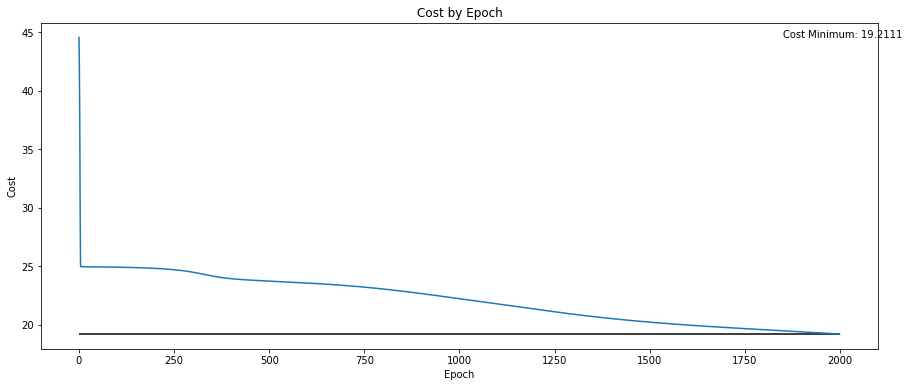

In [59]:
plt.figure(figsize = (15, 6))
plt.plot(cost)
plt.hlines(min(cost), 0, epoch)
plt.text(epoch - 150, max(cost), 'Cost Minimum: %.4f' % min(cost))
plt.title('Cost by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

## Create new data and re-run
Create new data and re-run from **Weights and Bias**.

In [60]:
X = np.random.binomial(1, 0.7, (100, 7))
y = np.random.binomial(1, 0.5, (X.shape[0], 1))

input_layer_size = X.shape[1]
hidden_layer_1_size = 5

In [61]:
# weight and bias initialization
wh1 = np.random.uniform(size = (input_layer_size, hidden_layer_1_size))
bh1 = np.random.uniform(size = (1, hidden_layer_1_size))
wout = np.random.uniform(size = (hidden_layer_1_size, output_layer_size))
bout = np.random.uniform(size = (1, output_layer_size))

In [62]:
cost = []
for i in range(epoch):
    # Forward Propogation
    hidden_layer_1 = np.dot(X, wh1)
    hidden_layer_1 = hidden_layer_1 + bh1
    hidden_layer_1_activation = sigmoid(hidden_layer_1)
    
    output_layer = np.dot(hidden_layer_1_activation, wout)
    output_layer = output_layer + bout
    
    output = sigmoid(output_layer)

    # Backpropagation
    E = y - output
    cost.append(np.square(E).sum())
    
    slope_output_layer = sigmoid_derivative(output)
    slope_hidden_layer_1 = sigmoid_derivative(hidden_layer_1_activation)
    d_output = E * slope_output_layer
    
    error_hidden_layer_1 = d_output.dot(wout.T)
    d_hidden_layer_1 = error_hidden_layer_1 * slope_hidden_layer_1
    
    wout += hidden_layer_1_activation.T.dot(d_output) * lr
    bout += np.sum(d_output,  axis = 0, keepdims = True) * lr
    wh1 += X.T.dot(d_hidden_layer_1) * lr
    bh1 += np.sum(d_hidden_layer_1,  axis = 0, keepdims = True) * lr

In [63]:
ii = range(len(y))
yy = y.flatten()
oo = output.flatten()
ab = np.abs(oo - yy)
bo = np.array([0 if oi < 0.5 else 1 for oi in oo])
tt = ['Yes' if ti else 'No' for ti in (yy == bo)]

print('index Expect Output Error Binary Correct')
print('----- ------ ------ ----- ------ -------')
ima = int((0.9 * len(yy)))
imi = len(yy) - ima
dots = True
for i, a, b, c, d, e in zip(ii, yy, oo, ab, bo, tt):
    if (i < imi) | (i > ima):
        print(' %3d     %d    %.2f   %.2f    %d     %s' % (i, a, b, c, d, e))
    else:
        if dots:
            print(' ...')
            dots = False
aa = (yy == bo).sum() / len(yy)
print('\nCost Minimum: %.4f' % min(cost))
print('Accuracy    : %.2f' % aa)

index Expect Output Error Binary Correct
----- ------ ------ ----- ------ -------
   0     1    0.76   0.24    1     Yes
   1     1    0.46   0.54    0     No
   2     1    0.72   0.28    1     Yes
   3     1    0.51   0.49    1     Yes
   4     1    0.86   0.14    1     Yes
   5     0    0.44   0.44    0     Yes
   6     0    0.27   0.27    0     Yes
   7     0    0.02   0.02    0     Yes
   8     0    0.55   0.55    1     No
   9     0    0.49   0.49    0     Yes
 ...
  91     0    0.42   0.42    0     Yes
  92     1    0.80   0.20    1     Yes
  93     0    0.59   0.59    1     No
  94     1    0.83   0.17    1     Yes
  95     0    0.14   0.14    0     Yes
  96     0    0.37   0.37    0     Yes
  97     1    0.44   0.56    0     No
  98     0    0.46   0.46    0     Yes
  99     0    0.37   0.37    0     Yes

Cost Minimum: 14.6608
Accuracy    : 0.79


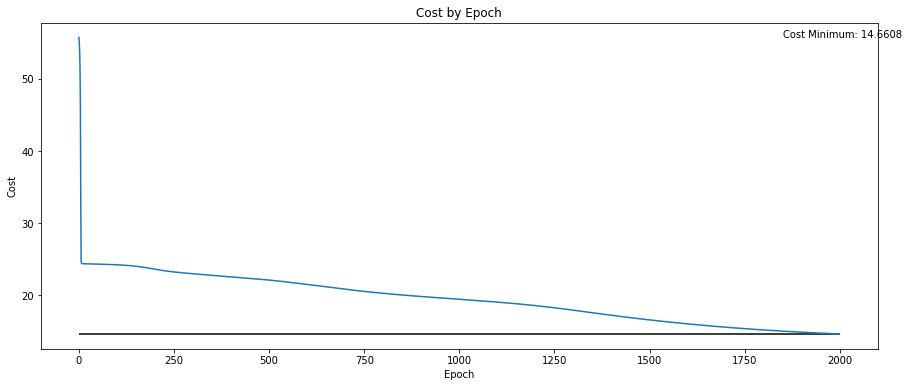

In [64]:
plt.figure(figsize = (15, 6))
plt.plot(cost)
plt.hlines(min(cost), 0, epoch)
plt.text(epoch - 150, max(cost), 'Cost Minimum: %.4f' % min(cost))
plt.title('Cost by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

>

>

>



---



---



> > > > > > > > > © 2019 Data Science Institute of Australia


---



---



